## Visualize GLow results in 16+4 scenario

In [100]:
from logging import WARNING, INFO
from typing import Callable, Dict, List, Optional, Tuple, Union
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import cm

### Parse output data

In [101]:
run_name = 'graph_16_32'
seed = '1999'
save_path = '../plots/'
#file_path = 'outputs/no_pretrain/' + 'seed_' + seed + '/' + run_name #NEED TO READ ALL FILES
root_path = '../outputs/GL/CIFAR10/seed1999_rounds2048/'
file_path = root_path + run_name
num_agents = 20

In [102]:
tplgys = []
raw_tplgys = []
acc_distr = []
for i in range(9):
    # Read file
    file = open(file_path+'/'+str(i)+'_'+run_name+'_pool.out', mode = 'r', encoding = 'utf-8-sig')
    lines = file.readlines()
    tplgys.append(lines)
    file.close()

    # Read file
    file = open(file_path+'/'+str(i)+'_'+run_name+'_raw.out', mode = 'r', encoding = 'utf-8-sig')
    r_lines = file.readlines()
    raw_tplgys.append(r_lines)
    file.close()

    # Read file
    file = open(file_path+'/'+str(i)+'_'+run_name+'_acc_distr.out', mode = 'r', encoding = 'utf-8-sig')
    a_lines = file.readlines()
    acc_distr.append(a_lines)
    file.close()

In [103]:
tplgy_ID = []
loss = []
acc = []

for tplgy in tplgys:
    tmp1 = []
    tmp2 = []
    tmp3 = []
    for line in tplgy:
        tmp1.append(int(line.split(' ')[1]))
        tmp2.append(float(line.split(' ')[-3]))
        tmp3.append(float(line.split(' ')[-1]))
    tplgy_ID.append(tmp1)
    loss.append(tmp2)
    acc.append(tmp3)
print(tplgy_ID)
print(loss)
print(acc)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]
[[181.9175534248352, 312.1430423259735, 304.12865447998047, 273.90790247917175, 298.8046157360077, 181.91263103485107, 282.24940276145935, 284.85545110702515, 318.77986431121826, 299.0361442565918, 181.8786220550537, 292.8213481903076, 275.14999437332153, 276.6448874473572, 290.9777772426605, 287.70729780197144, 282.0148377418518, 279.44060254096985

In [104]:
exec_times = []
for tplgy in raw_tplgys:
    exec_times.append(float(tplgy[-1].split(' ')[1])/60)
print(exec_times)

[1033.848872021834, 1123.6122358520827, 1237.0928174138069, 1355.7990198850632, 1955.888975115617, 2034.211833568414, 2134.4178254961967, 2218.1581984877585, 2269.4980467915534]


### Accuracies per node ID after *n* comm rounds

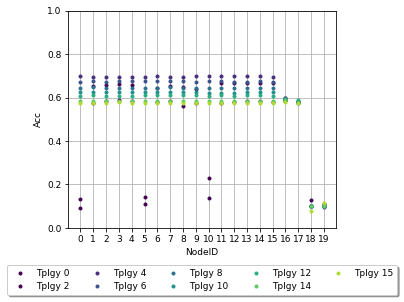

In [105]:
font = {'size': 9}
plt.rc('font', **font)
viridis = cm.get_cmap('viridis', 9)
plt.plot(tplgy_ID[0], acc[0], '.', color=viridis(0))
plt.plot(tplgy_ID[1], acc[1], '.', color=viridis(0.1))
plt.plot(tplgy_ID[2], acc[2], '.', color=viridis(0.2))
plt.plot(tplgy_ID[3], acc[3], '.', color=viridis(0.3))
plt.plot(tplgy_ID[4], acc[4], '.', color=viridis(0.4))
plt.plot(tplgy_ID[5], acc[5], '.', color=viridis(0.5))
plt.plot(tplgy_ID[6], acc[6], '.', color=viridis(0.6))
plt.plot(tplgy_ID[7], acc[7], '.', color=viridis(0.7))
plt.plot(tplgy_ID[8], acc[8], '.', color=viridis(0.8))
plt.ylim(0, 1.)
x = np.arange(0, num_agents, 1)
plt.xticks(x)
#plt.title("Tplgy 0", fontsize=9)
plt.xlabel('NodeID')
plt.ylabel('Acc')
plt.grid()

ax = plt.gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
lgd = ax.legend(['Tplgy 0', 'Tplgy 2', 'Tplgy 4', 'Tplgy 6', 'Tplgy 8','Tplgy 10', 'Tplgy 12', 'Tplgy 14', 'Tplgy 15'], loc='upper center',shadow=True, bbox_to_anchor=(0.5, -0.15), ncol = 5, fancybox= True)
plt.savefig(save_path+run_name+'_summarized_acc.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

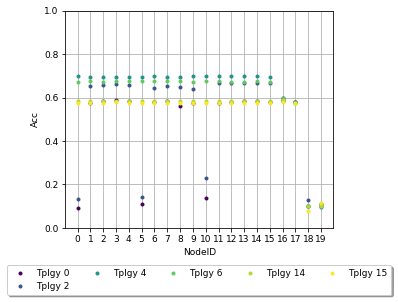

In [106]:
# Reduce the number of topologies for visualization
font = {'size': 9}
plt.rc('font', **font)
viridis = cm.get_cmap('viridis', 9)
plt.plot(tplgy_ID[0], acc[0], '.', color=viridis(0))
plt.plot(tplgy_ID[1], acc[1], '.', color=viridis(0.3))
plt.plot(tplgy_ID[2], acc[2], '.', color=viridis(0.5))
plt.plot(tplgy_ID[3], acc[3], '.', color=viridis(0.7))
#plt.plot(tplgy_ID[4], acc[4], '.', color=viridis(0.4))
#plt.plot(tplgy_ID[5], acc[5], '.', color=viridis(0.5))
#plt.plot(tplgy_ID[6], acc[6], '.', color=viridis(0.6))
plt.plot(tplgy_ID[7], acc[7], '.', color=viridis(0.8))
plt.plot(tplgy_ID[8], acc[8], '.', color=viridis(1.))
plt.ylim(0, 1.)
x = np.arange(0, num_agents, 1)
plt.xticks(x)
#plt.title("Tplgy 0", fontsize=9)
plt.xlabel('NodeID')
plt.ylabel('Acc')
plt.grid()

ax = plt.gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
lgd = ax.legend(['Tplgy 0', 'Tplgy 2', 'Tplgy 4', 'Tplgy 6', 'Tplgy 14','Tplgy 15'], loc='upper center',shadow=True, bbox_to_anchor=(0.5, -0.15), ncol = 5, fancybox= True)
plt.savefig(save_path+run_name+'_summarized_acc.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

### Losses per node ID after *n* comm rounds

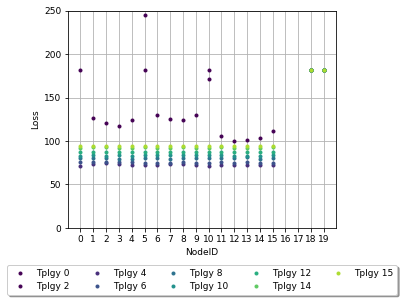

In [107]:
font = {'size': 9}
plt.rc('font', **font)
viridis = cm.get_cmap('viridis', 9)
plt.plot(tplgy_ID[0], loss[0], '.', color=viridis(0))
plt.plot(tplgy_ID[1], loss[1], '.', color=viridis(0.1))
plt.plot(tplgy_ID[2], loss[2], '.', color=viridis(0.2))
plt.plot(tplgy_ID[3], loss[3], '.', color=viridis(0.3))
plt.plot(tplgy_ID[4], loss[4], '.', color=viridis(0.4))
plt.plot(tplgy_ID[5], loss[5], '.', color=viridis(0.5))
plt.plot(tplgy_ID[6], loss[6], '.', color=viridis(0.6))
plt.plot(tplgy_ID[7], loss[7], '.', color=viridis(0.7))
plt.plot(tplgy_ID[8], loss[8], '.', color=viridis(0.8))
plt.ylim(0, 250)
x = np.arange(0, num_agents, 1)
plt.xticks(x)
#plt.title("Tplgy 0", fontsize=9)
plt.xlabel('NodeID')
plt.ylabel('Loss')
plt.grid()

ax = plt.gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

lgd = ax.legend(['Tplgy 0', 'Tplgy 2', 'Tplgy 4', 'Tplgy 6', 'Tplgy 8','Tplgy 10', 'Tplgy 12', 'Tplgy 14', 'Tplgy 15'], loc='upper center',shadow=True, bbox_to_anchor=(0.5, -0.15), ncol = 5, fancybox= True)
plt.savefig(save_path+run_name+'_summarized_loss.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

### Loss evolution of each agent by topology

In [108]:
#VISUALIZE LOSSES PER TOPOLOGY AND AGENT
loss_per_tplgy = []
num_rounds = 2048
for tplgy in raw_tplgys:
    tmp = tplgy[1].split()
    tmp_loss = []
    for i in range(1,num_rounds + 1):
        tmp_loss.append((float(tmp[2*i][:-1])))
    loss_per_tplgy.append(tmp_loss)

In [109]:
#VISUALIZE LOSSES PER TOPOLOGY AND AGENT
loss_per_tplgy_by_agent = []
num_rounds = 2048
for loss_tplgy in loss_per_tplgy:
    loss_per_agent = []
    for i in range(num_agents):
        tmp_loss = []
        for j in range(1+i, num_rounds, num_agents):
            tmp_loss.append((loss_tplgy[j]))
        loss_per_agent.append(tmp_loss)
    loss_per_tplgy_by_agent.append(loss_per_agent)

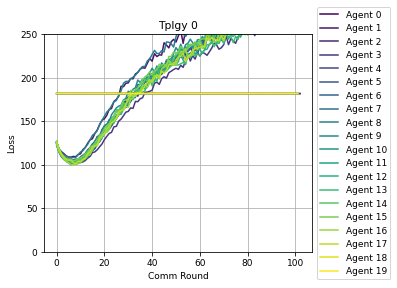

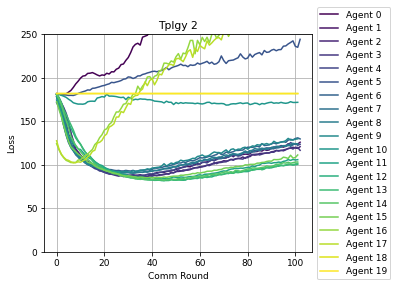

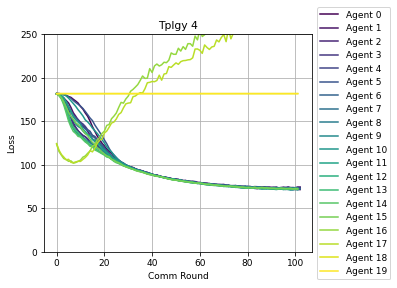

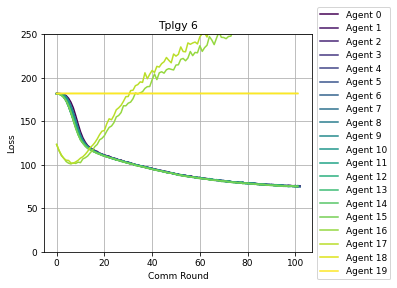

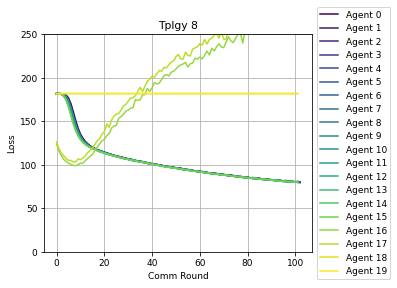

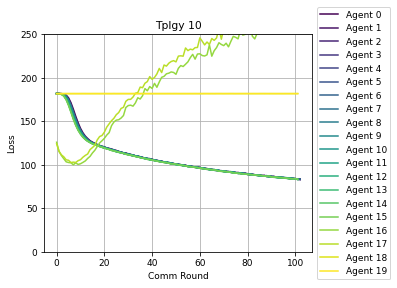

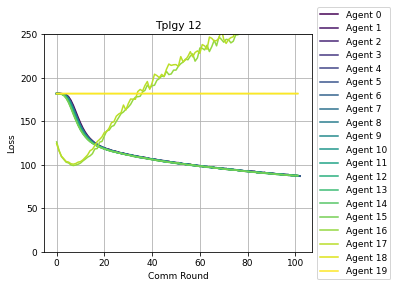

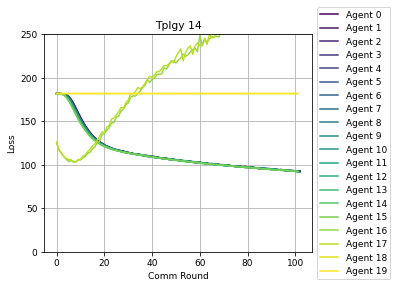

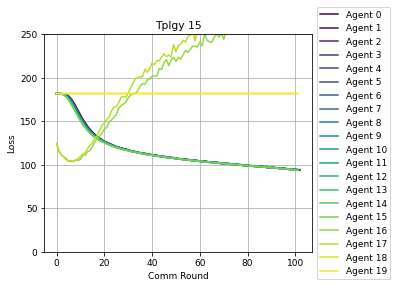

In [110]:
#VISUALIZE LOSSES PER TOPOLOGY AND AGENT
viridis = cm.get_cmap('viridis', 20)
font = {'size': 9}
titles = ['Tplgy 0', 'Tplgy 2', 'Tplgy 4', 'Tplgy 6', 'Tplgy 8','Tplgy 10', 'Tplgy 12', 'Tplgy 14', 'Tplgy 15']
for i in range(9):
    plt.rc('font', **font)
    plt.plot(loss_per_tplgy_by_agent[i][0], color=viridis(0.))
    plt.plot(loss_per_tplgy_by_agent[i][1], color=viridis(0.05))
    plt.plot(loss_per_tplgy_by_agent[i][2], color=viridis(0.1))
    plt.plot(loss_per_tplgy_by_agent[i][3], color=viridis(0.15))
    plt.plot(loss_per_tplgy_by_agent[i][4], color=viridis(0.2))
    plt.plot(loss_per_tplgy_by_agent[i][5], color=viridis(0.25))
    plt.plot(loss_per_tplgy_by_agent[i][6], color=viridis(0.3))
    plt.plot(loss_per_tplgy_by_agent[i][7], color=viridis(0.35))
    plt.plot(loss_per_tplgy_by_agent[i][8], color=viridis(0.4))
    plt.plot(loss_per_tplgy_by_agent[i][9], color=viridis(0.45))
    plt.plot(loss_per_tplgy_by_agent[i][10],color=viridis(0.5))
    plt.plot(loss_per_tplgy_by_agent[i][11],color=viridis(0.55))
    plt.plot(loss_per_tplgy_by_agent[i][12],color=viridis(0.6))
    plt.plot(loss_per_tplgy_by_agent[i][13],color=viridis(0.65))
    plt.plot(loss_per_tplgy_by_agent[i][14],color=viridis(0.7))
    plt.plot(loss_per_tplgy_by_agent[i][15],color=viridis(0.75))
    plt.plot(loss_per_tplgy_by_agent[i][16],color=viridis(0.8))
    plt.plot(loss_per_tplgy_by_agent[i][17],color=viridis(0.85))
    plt.plot(loss_per_tplgy_by_agent[i][18],color=viridis(0.9))
    plt.plot(loss_per_tplgy_by_agent[i][19],color=viridis(0.95))
    plt.ylim(0, 250)
    plt.xlabel('Comm Round')
    plt.ylabel('Loss')
    plt.title(titles[i])
    plt.grid()

    ax = plt.gca()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    ax.legend(['Agent 0', 'Agent 1', 'Agent 2', 'Agent 3', 'Agent 4', 'Agent 5', 'Agent 6', 'Agent 7', 'Agent 8', 'Agent 9', 'Agent 10', 'Agent 11', 'Agent 12', 'Agent 13', 'Agent 14', 'Agent 15', 'Agent 16', 'Agent 17', 'Agent 18', 'Agent 19'], loc='center left', bbox_to_anchor=(1, 0.5))

    plt.savefig(save_path+str(i)+'_'+run_name+'_raw_summarized_loss.pdf')
    plt.show()


### Performance (Acc) evolution of each agent by topology

In [111]:
'''Visualize acc average per pool and comm round'''

acc1 = []
for accuracies in acc_distr:
    acc2 = []
    for acc in accuracies:
        #res = [float(idx) for idx in acc.split(' ')]
        res = []
        for idx in acc.split(' '):
            f_idx = float(idx)
            if f_idx == 1.0:
                f_idx = 0.0
            res.append(f_idx)
        acc2.append(np.average(res))
    acc1.append(acc2)

In [112]:
'''Create sets with exec times'''
acc_per_nodes = []
for i in range(num_agents):
    tmp_tplgy = []
    for j in range(9):
        tmp_tplgy.append(acc1[j][i::20])
    acc_per_nodes.append(tmp_tplgy)

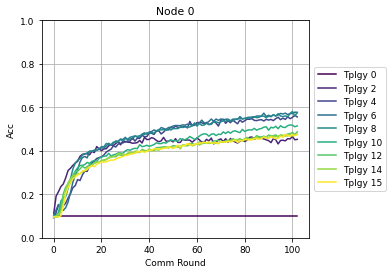

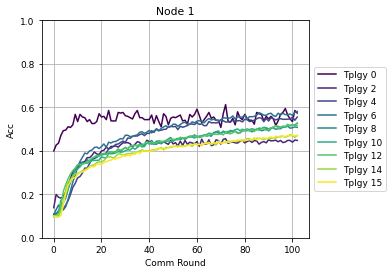

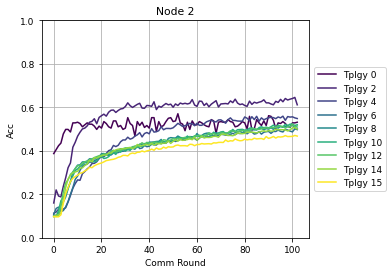

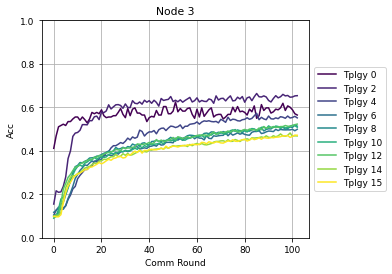

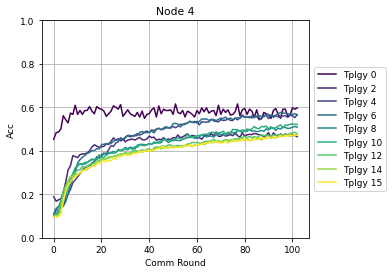

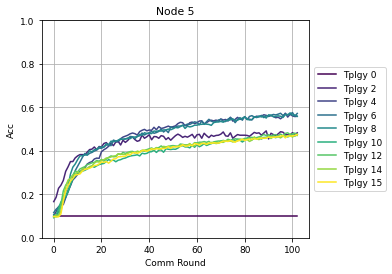

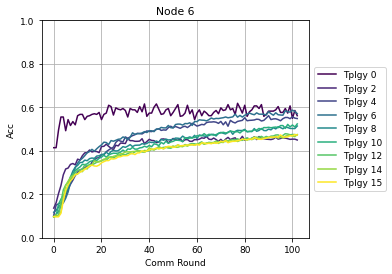

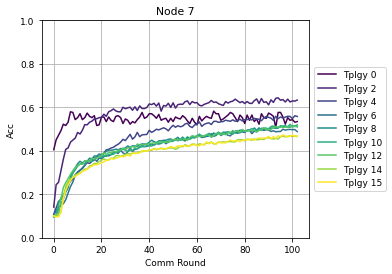

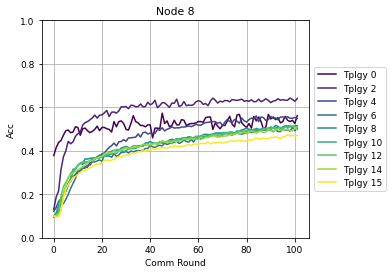

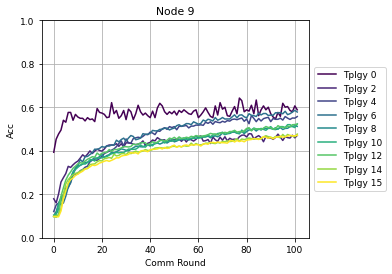

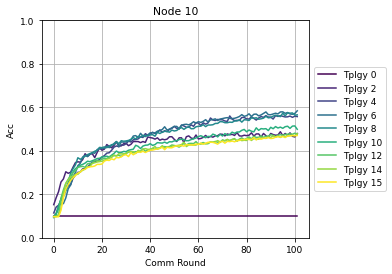

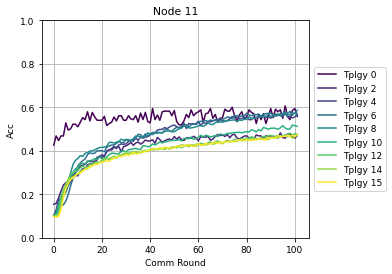

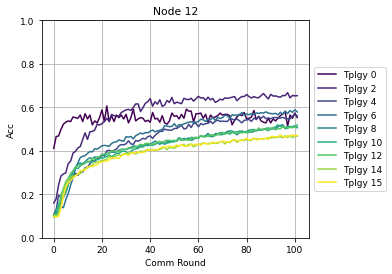

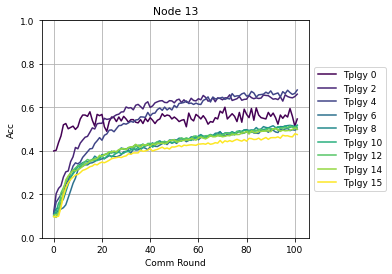

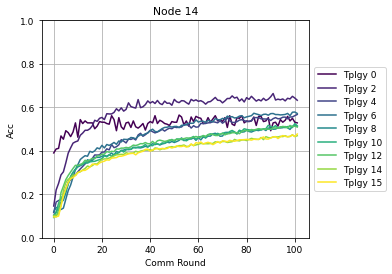

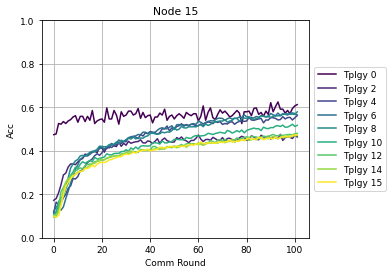

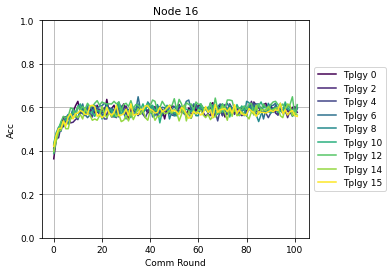

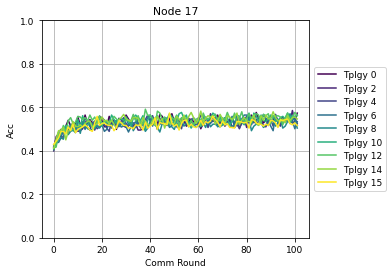

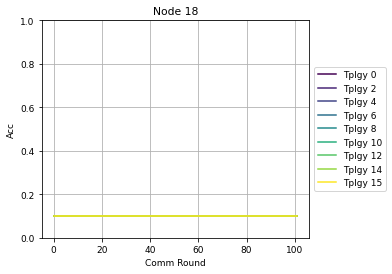

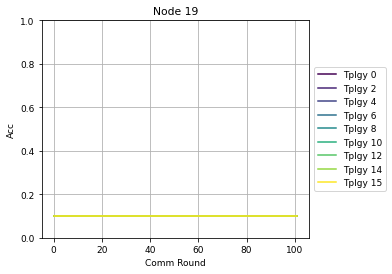

In [113]:
font = {'size': 9}
viridis = cm.get_cmap('viridis', 20)
for node in range(num_agents):
    plt.rc('font', **font)
    for i in range(9):
        plt.plot(acc_per_nodes[node][i], color=viridis(0.12*i))
    #x = np.arange(0, num_rounds, 1)
    #plt.xticks(x)
    plt.ylim(0.0, 1.0)
    plt.title('Node ' + str(node))
    plt.xlabel('Comm Round')
    plt.ylabel('Acc')
    plt.grid()
    ax = plt.gca()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(['Tplgy 0', 'Tplgy 2', 'Tplgy 4', 'Tplgy 6', 'Tplgy 8','Tplgy 10', 'Tplgy 12', 'Tplgy 14', 'Tplgy 15'], loc='center left', bbox_to_anchor=(1, 0.5))
    plt.savefig(save_path+'node'+ str(node) +'_distr_val_acc.pdf')
    plt.show()

### Execution times

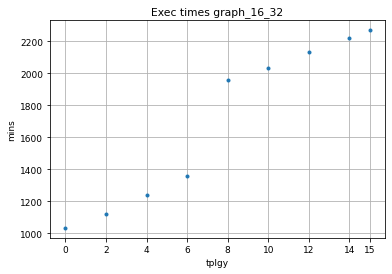

In [114]:
'''Visualize Exec times per topology'''
font = {'size': 9}
plt.rc('font', **font)
x = [0, 2, 4, 6, 8, 10, 12, 14, 15]
plt.plot(x, exec_times, '.')
plt.xticks(x)
plt.xlabel("tplgy")
plt.ylabel("mins")
plt.title("Exec times " + run_name)
plt.grid()
plt.savefig(save_path+run_name+'_exec_times.pdf')
plt.show()